In [1]:
library(GLMsData)
data(fluoro)

In [2]:
str(fluoro)

'data.frame':	19 obs. of  2 variables:
 $ Time: int  37 48 52 57 58 61 66 67 75 75 ...
 $ Dose: num  4.39 3.46 8 5.47 8 ...


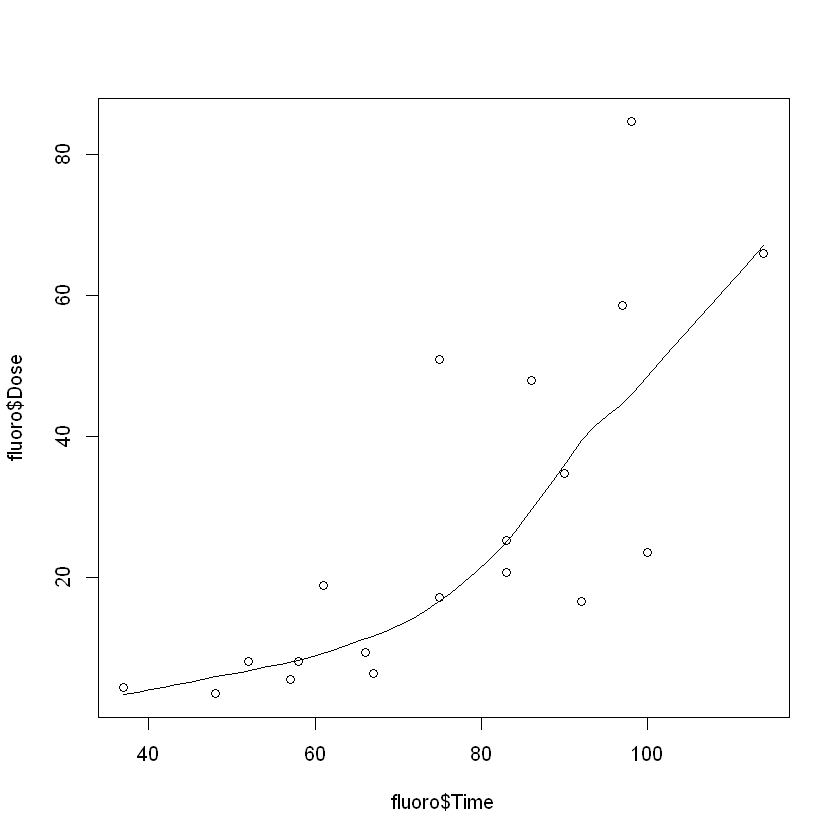

In [3]:
scatter.smooth(fluoro$Dose ~ fluoro$Time)

In [4]:
lm.1 <- lm(Dose ~ Time, data=fluoro)

In [5]:
coef(summary(lm.1))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-39.6637988,14.4862932,-2.738023,0.0140153380
Time,0.8783128,0.1849577,4.748724,0.0001859731


In [6]:
anova(lm.1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Time,1,5837.965,5837.9647,22.55038,0.0001859731
Residuals,17,4401.053,258.8855,NA,NA


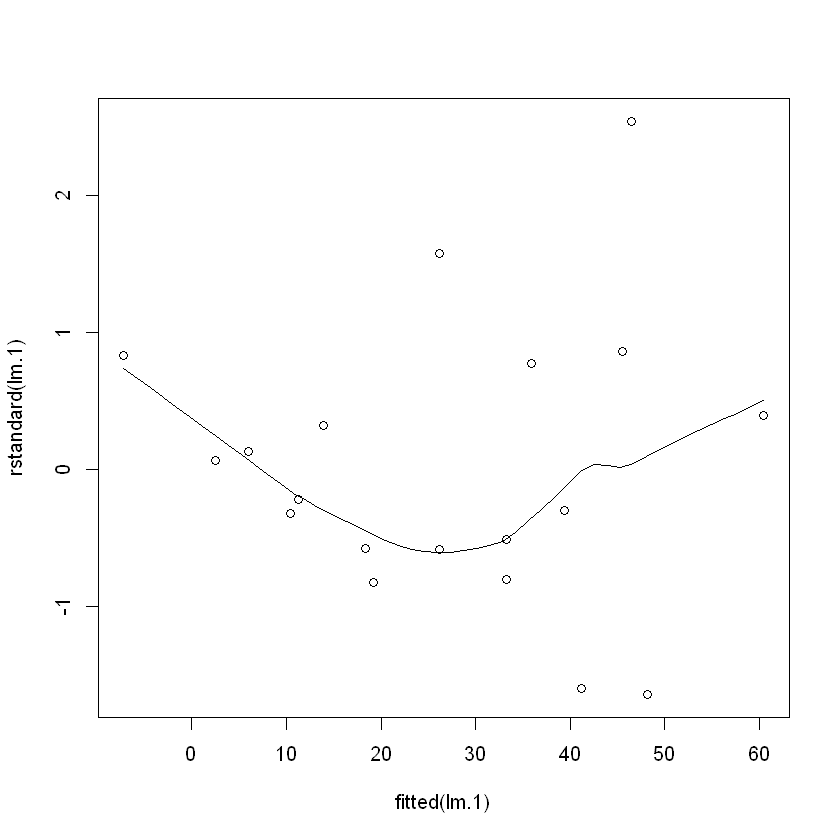

In [7]:
scatter.smooth(rstandard(lm.1) ~ fitted(lm.1))

In [8]:
library(MASS)

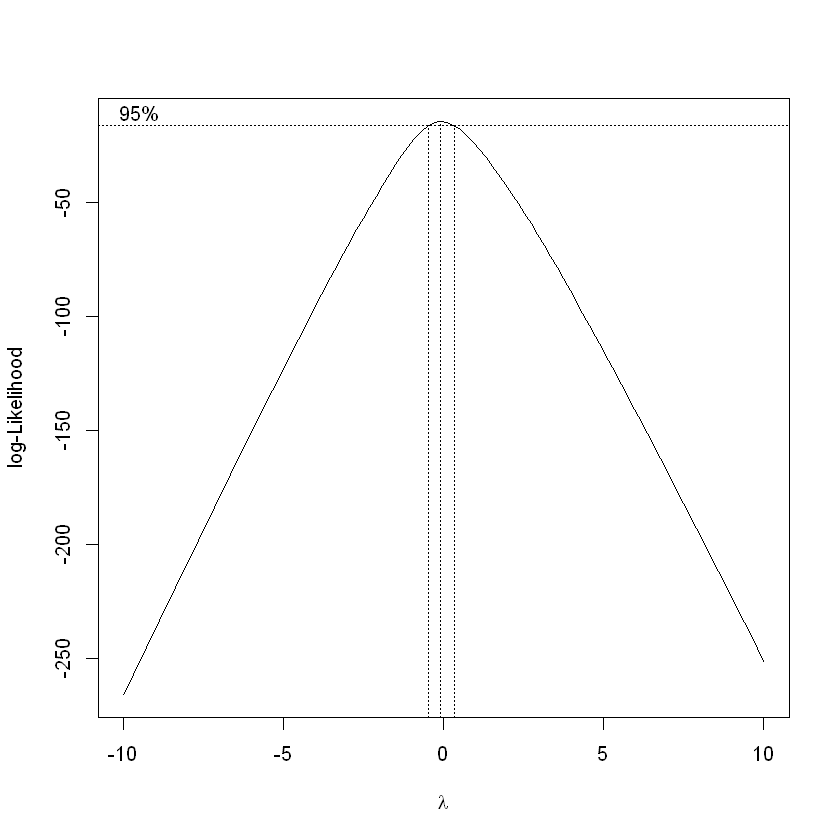

In [10]:
boxcox(Dose ~ Time, lambda=seq(-10, 10, length=100), data=fluoro)

In [11]:
lm.2 <- lm(log(Dose) ~ Time, data=fluoro)

In [12]:
coef(summary(lm.2))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-0.19993936,0.468631933,-0.4266448,6.749920e-01
Time,0.04067251,0.005983385,6.7975751,3.108832e-06


In [13]:
anova(lm.2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Time,1,12.518864,12.5188642,46.20703,3.108832e-06
Residuals,17,4.605808,0.2709299,NA,NA


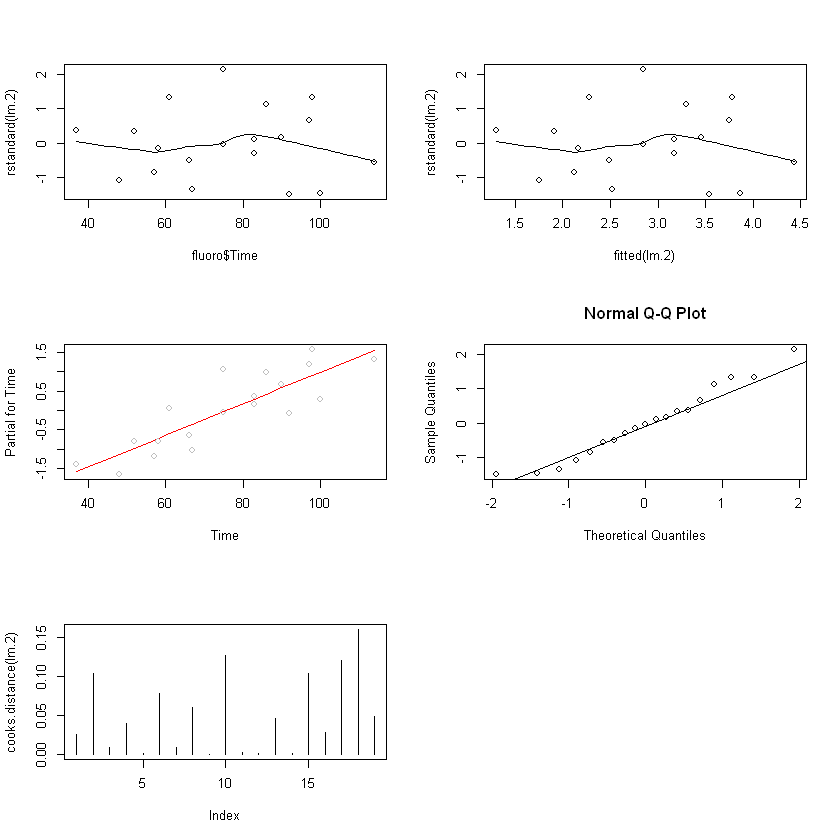

In [16]:
par(mfrow=c(3, 2))
scatter.smooth(rstandard(lm.2) ~ fluoro$Time)
scatter.smooth(rstandard(lm.2) ~ fitted(lm.2))
termplot(lm.2, partial.resid = TRUE, terms="Time")
qqnorm(rstandard(lm.2))
qqline(rstandard(lm.2))
plot(cooks.distance(lm.2), type="h")

In [17]:
rowSums(influence.measures(lm.2)$is.inf)

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 
 1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  1

In [19]:
hatvalues(lm.2) > 3*2/19

1     2     3     4     5     6     7     8     9    10    11    12    13 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
   14    15    16    17    18    19 
FALSE FALSE FALSE FALSE FALSE FALSE